In [1]:
import ROOT
import array
import math
from IPython.display import Image as Plot
ROOT.gROOT.SetBatch(1)

def destruct(object_):
    if issubclass(type(object_), ROOT.TObject):
        object_.IsA().Destructor(object_)

# Good fit
g_xres = 950
g_yres = 425

#Good res
#g_xres = 1024
#g_yres = 768

infile = open("data/test_340_MeV_mupi.hepevt")
infile.readline()
t = 0
nDaughter = 0
counter = 1
header = True
event = array.array("I",[])
statusCode = array.array("I",[])
pdgCode = array.array("I",[])
firstMother = array.array("I",[])
secondMother = array.array("I",[])
firstDaughter = array.array("I",[])
secondDaughter = array.array("I",[])
px = array.array("f",[])
py = array.array("f",[])
pz = array.array("f",[])
energy = array.array("f",[])
mass = array.array("f",[])
xStart = array.array("f",[])
yStart = array.array("f",[])
zStart = array.array("f",[])
tStart = array.array("f",[])

eNu= array.array("f",[])
pTot = array.array("f",[])
pTrans = array.array("f",[])
pTransEv = array.array("f",[])
sepAngle = array.array("f",[])
thetaxy = array.array("f",[])
thetaxz = array.array("f",[])
thetayz = array.array("f",[])

for line in infile:
    #if header:
    x = line.split()
    header = True if len(x)==2 else False
        
    if header==True:
        headEvent = int(x[0])
        nDaughter = int(x[1])
    else:
        x = line.split()
        event.append(headEvent)
        statusCode.append(int(x[0]))
        pdgCode.append(int(x[1]))
        firstMother.append(int(x[2]))
        secondMother.append(int(x[3]))
        firstDaughter.append(int(x[4]))
        secondDaughter.append(int(x[5]))
        px.append(float(x[6]))
        py.append(float(x[7]))
        pz.append(float(x[8]))
        energy.append(float(x[9]))
        mass.append(float(x[10]))
        xStart.append(float(x[11]))
        yStart.append(float(x[12]))
        zStart.append(float(x[13]))
        tStart.append(float(x[14]))
        
        counter = counter + 1
        t = t+1
        
    if counter == nDaughter:
        header = True
        counter = 1
        nDaughter = 0
    else:
        header = False
        
#Calculate other quantities
v = int(t/2.)
for i in range(0,t):
    pTot.append(math.sqrt(px[i]**2 + py[i]**2 + pz[i]**2))
    pTrans.append(math.sqrt(px[i]**2 + py[i]**2))
    thetaxy.append(math.degrees(math.acos(px[i]/pTrans[i])))
    thetaxz.append(math.degrees(math.acos(pz[i]/math.sqrt(px[i]**2 + pz[i]**2))))
    thetayz.append(math.degrees(math.acos(pz[i]/math.sqrt(py[i]**2 + pz[i]**2))))
    
for i in range(0,v):
        dotX = px[2*i]*px[(2*i)+1]
        dotY = py[2*i]*py[(2*i)+1]
        dotZ = pz[2*i]*pz[(2*i)+1]
        dotProd = dotX + dotY + dotZ
        regProd = pTot[2*i]*pTot[(2*i)+1]
        sepAngle.append(math.degrees(math.acos(dotProd/regProd)))
        eNu.append(energy[2*i]+energy[(2*i)+1])
        pTransEv.append(pTrans[2*i] + pTrans[(2*i)+1])
        

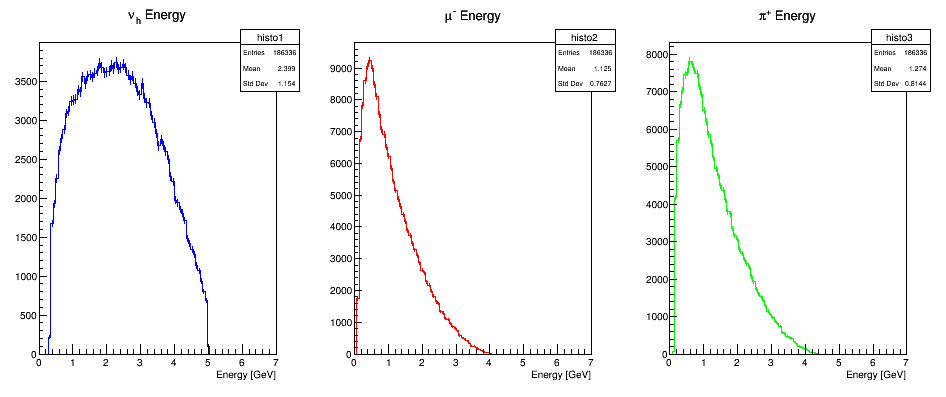

In [2]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1F("histo1","#nu_{h} Energy",100,0,7)
h2 = ROOT.TH1F("histo2","#mu^{-} Energy",100,0,7)
h3 = ROOT.TH1F("histo3","#pi^{+} Energy",100,0,7)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
h1.GetXaxis().SetTitle("Energy [GeV]")
h2.GetXaxis().SetTitle("Energy [GeV]")
h3.GetXaxis().SetTitle("Energy [GeV]")

for i in range(0,v):  
    h1.Fill(eNu[i])

for i in range(0,t):
    if pdgCode[i]==13:
        h2.Fill(energy[i])
    if pdgCode[i]==211:
        h3.Fill(energy[i])

c1.Divide(3,1)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")
c1.cd(3)
h3.Draw("EH")

c1.SaveAs("png/histo1.png")
destruct(c1)
destruct(h1)
destruct(h2)
destruct(h3)
Plot("png/histo1.png")

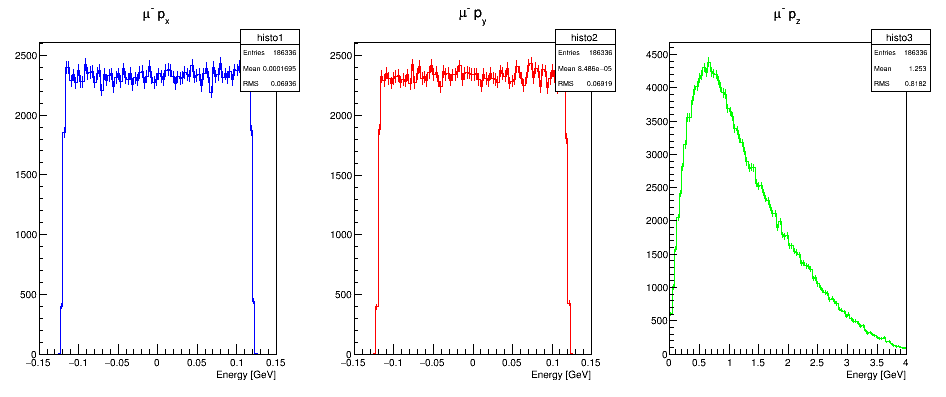

In [33]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1F("histo1","#mu^{-} p_{x}",100,-0.15,0.15)
h2 = ROOT.TH1F("histo2","#mu^{-} p_{y}",100,-0.15,0.15)
h3 = ROOT.TH1F("histo3","#mu^{-} p_{z}",100,0,4)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
h1.GetXaxis().SetTitle("Energy [GeV]")
h2.GetXaxis().SetTitle("Energy [GeV]")
h3.GetXaxis().SetTitle("Energy [GeV]")

for i in range(0,t):
    if pdgCode[i]==13:
        h1.Fill(px[i])
        h2.Fill(py[i])
        h3.Fill(pz[i])

c1.Divide(3,1)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")
c1.cd(3)
h3.Draw("EH")

c1.SaveAs("png/histo2.png")
destruct(c1)
destruct(h1)
destruct(h2)
destruct(h3)
Plot("png/histo2.png")

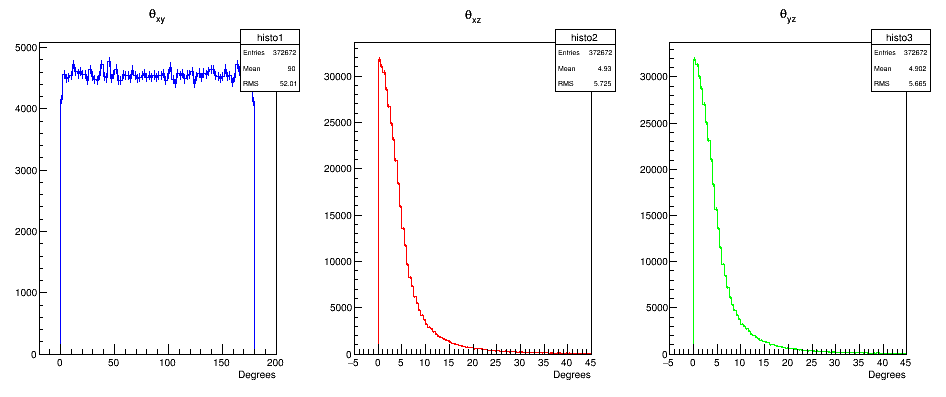

In [34]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1F("histo1","#theta_{xy}",100,-20,200)
h2 = ROOT.TH1F("histo2","#theta_{xz}",100,-5,45)
h3 = ROOT.TH1F("histo3","#theta_{yz}",100,-5,45)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
h1.GetXaxis().SetTitle("Degrees")
h2.GetXaxis().SetTitle("Degrees")
h3.GetXaxis().SetTitle("Degrees")

for i in range(0,t):
    h1.Fill(thetaxy[i])
    h2.Fill(thetaxz[i])
    h3.Fill(thetayz[i])


c1.Divide(3,1)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")
c1.cd(3)
h3.Draw("EH")

c1.SaveAs("png/histo3.png")
destruct(c1)
destruct(h1)
destruct(h2)
destruct(h3)
Plot("png/histo3.png")

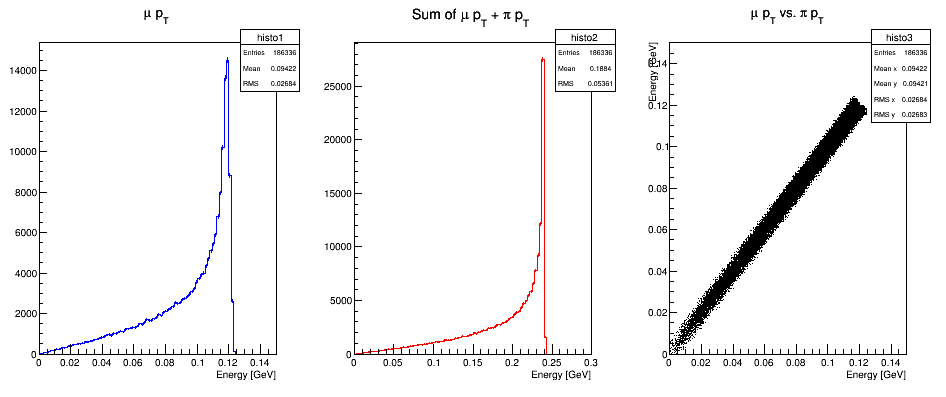

In [44]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1F("histo1","#mu p_{T}",100,0,0.15)
h2 = ROOT.TH1F("histo2","Sum of #mu p_{T} + #pi p_{T} ",100,0,0.3)
h3 = ROOT.TH2F("histo3","#mu p_{T} vs. #pi p_{T}",100,0,0.15,100,0,0.15)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h1.GetXaxis().SetTitle("Energy [GeV]")
h2.GetXaxis().SetTitle("Energy [GeV]")
h3.GetXaxis().SetTitle("Energy [GeV]")
h3.GetYaxis().SetTitle("Energy [GeV]")
 
for i in range(0,t):
        if pdgCode[i] == 13:
            h1.Fill(pTrans[i])
for i in range(0,v):
        h2.Fill(pTransEv[i])
        h3.Fill(pTrans[2*i],pTrans[(2*i)+1])

c1.Divide(3,1)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")
c1.cd(3)
h3.Draw("")

c1.SaveAs("png/histo5.png")
destruct(c1)
destruct(h1)
destruct(h2)
destruct(h3)
Plot("png/histo5.png")

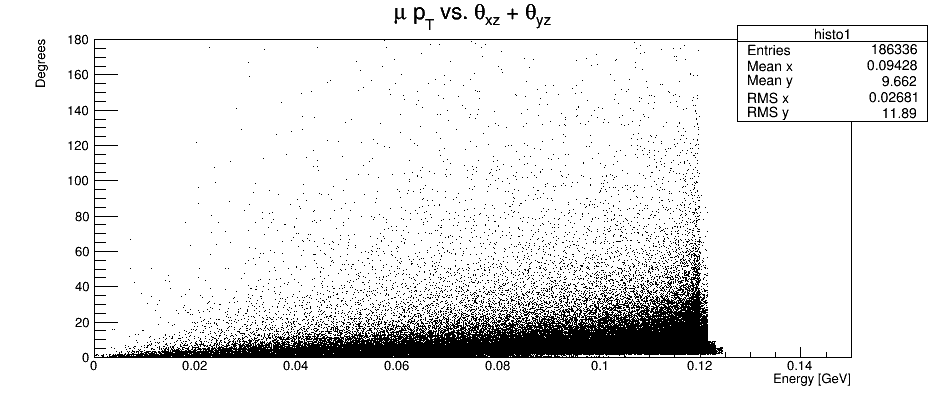

In [45]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH2F("histo1","#mu p_{T} vs. #theta_{xz} + #theta_{yz}",100,0,0.15,100,0,180)
h1.SetLineColor(ROOT.kBlue)
h1.GetXaxis().SetTitle("Energy [GeV]")
h1.GetYaxis().SetTitle("Degrees")
 
for i in range(0,t):
        if pdgCode[i] == 13:
            h1.Fill(pTrans[i],thetaxz[i]+thetayz[i])

h1.Draw("")

c1.SaveAs("png/histo4.png")
destruct(c1)
destruct(h1)
Plot("png/histo4.png")

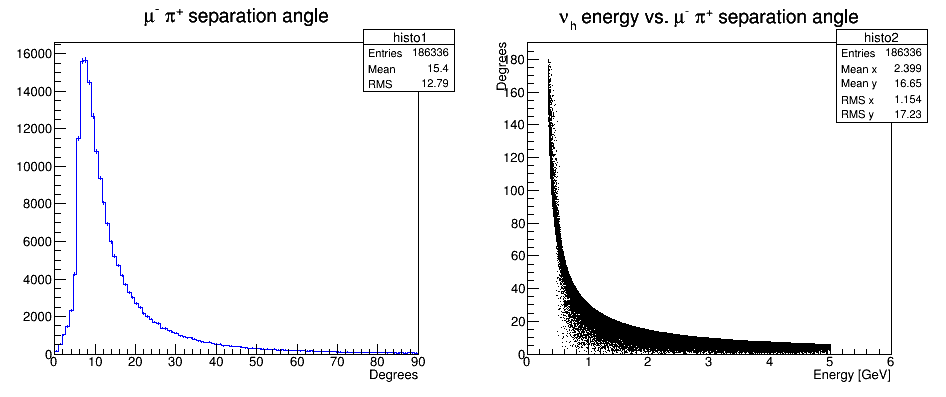

In [25]:
ROOT.gStyle.SetPalette(56);
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1F("histo1","#mu^{-} #pi^{+} separation angle",100,0,90)
h2 = ROOT.TH2F("histo2","#nu_{h} energy vs. #mu^{-} #pi^{+} separation angle",1000,0,6,1000,0,190)
h1.SetLineColor(ROOT.kBlue)
h1.GetXaxis().SetTitle("Degrees")
h2.GetXaxis().SetTitle("Energy [GeV]")
h2.GetYaxis().SetTitle("Degrees")
#h2.GetZaxis().SetRangeUser(-0.1,2500)
 
for i in range(0,v):
        h1.Fill(sepAngle[i])
        h2.Fill(eNu[i],sepAngle[i])

c1.Divide(2,1)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("")

c1.SaveAs("png/histo6.png")
destruct(c1)
destruct(h1)
destruct(h2)
Plot("png/histo6.png")

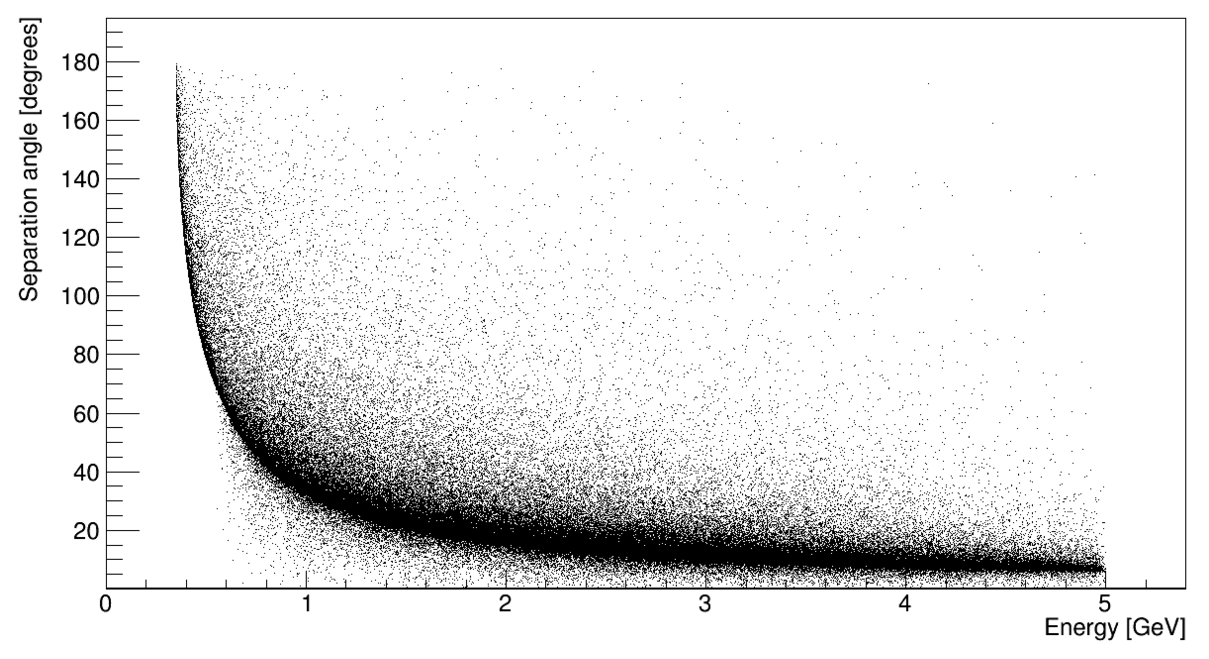

In [23]:
Plot("png/histo0.png")